In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv(r"D:\Unified Mentor Intership\Data Science projects\Road Accident 2020\Regulatory Affairs of Road Accident Data 2020 India.csv")
df

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0
...,...,...,...,...,...
9545,Vizaq,Weather,Sunny/Clear,Greviously Injured,561.0
9546,Vizaq,Weather,Sunny/Clear,Minor Injury,252.0
9547,Vizaq,Weather,Sunny/Clear,Persons Killed,176.0
9548,Vizaq,Weather,Sunny/Clear,Total number of Accidents,1207.0


In [7]:
df.shape

(9550, 5)

In [9]:
df.columns.tolist()

['Million Plus Cities',
 'Cause category',
 'Cause Subcategory',
 'Outcome of Incident',
 'Count']

In [11]:
df.dtypes

Million Plus Cities     object
Cause category          object
Cause Subcategory       object
Outcome of Incident     object
Count                  float64
dtype: object

In [13]:
df.head()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [15]:
# Check missing values

df.isnull().sum()

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64

In [19]:
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]
df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)

In [21]:
# Check Again Missing Values

df.isnull().sum()

million_plus_cities    0
cause_category         0
cause_subcategory      0
outcome_of_incident    0
count                  0
dtype: int64

In [25]:
df.describe(include="all")

,million_plus_cities,cause_category,cause_subcategory,outcome_of_incident,count
count,9550,9550,9550,9550,9550.000000
unique,50,6,35,5,NaN
top,Agra,Road Features,Others,Greviously Injured,NaN
freq,191,2000,1450,2000,NaN
mean,NaN,NaN,NaN,NaN,103.595079
std,NaN,NaN,NaN,NaN,275.152200
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,12.000000
75%,NaN,NaN,NaN,NaN,70.000000


In [33]:
for col in df.columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'million_plus_cities':
['Agra' 'Ahmedabad' 'Allahabad(Prayagraj)' 'Amritsar' 'Asansol Durgapur'
 'Aurangabad' 'Bengaluru' 'Bhopal' 'Chandigarh' 'Chennai' 'Coimbatore'
 'Delhi' 'Dhanbad' 'Faridabad' 'Ghaziabad' 'Gwalior' 'Hyderabad' 'Indore'
 'Jabalpur' 'Jaipur' 'Jamshedpur' 'Jodhpur' 'Kannur' 'Kanpur' 'Khozikode'
 'Kochi' 'Kolkata' 'Kollam' 'Kota' 'Lucknow' 'Ludhiana' 'Madurai'
 'Mallapuram' 'Meerut' 'Mumbai' 'Nagpur' 'Nashik' 'Patna' 'Pune' 'Raipur'
 'Rajkot' 'Srinagar' 'Surat' 'Thiruvanthapuram' 'Thrissur'
 'Tiruchirapalli' 'Vadodra' 'Varanasi' 'Vijaywada city' 'Vizaq']

Unique values in 'cause_category':
['Traffic Control' 'Junction' 'Traffic Violation' 'Road Features'
 'Impacting Vehicle/Object' 'Weather']

Unique values in 'cause_subcategory':
['Flashing Signal/Blinker' 'Others' 'Police Controlled' 'Stop Sign'
 'Traffic Light Signal' 'Uncontrolled' 'Four arm Junction'
 'Round about Junction' 'Staggered Junction' 'T' 'Y'
 'Driving on Wrong side'
 'Drunken Driving/

In [39]:
city_summary = df.groupby(['million_plus_cities', 'outcome_of_incident'])['count'].sum().unstack().fillna(0)
print("\nCity-wise Outcome Summary:\n", city_summary)


City-wise Outcome Summary:
 outcome_of_incident   Greviously Injured  Minor Injury  Persons Killed  \
million_plus_cities                                                      
Agra                              2262.0        1536.0          3084.0   
Ahmedabad                         2856.0        1860.0          2040.0   
Allahabad(Prayagraj)               726.0        3666.0          3102.0   
Amritsar                           228.0         126.0           396.0   
Asansol Durgapur                  1218.0         258.0          1890.0   
Aurangabad                        1320.0         438.0           816.0   
Bengaluru                        10242.0        6264.0          3876.0   
Bhopal                            1116.0        9726.0          1422.0   
Chandigarh                          84.0         804.0           318.0   
Chennai                           5646.0       19932.0          5232.0   
Coimbatore                        2082.0        2250.0           390.0   
Delhi    

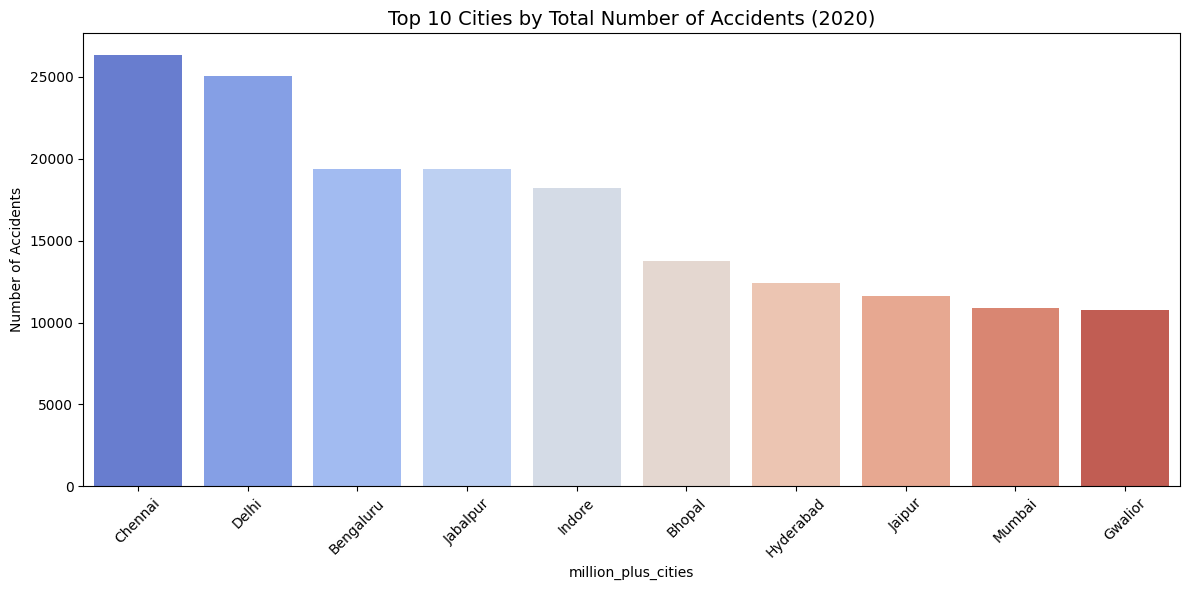

In [43]:
# Top 10 Cities by Total Accident
accident_data = df[df['outcome_of_incident'] == 'Total number of Accidents']
top_10_cities = accident_data.groupby('million_plus_cities')['count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette='coolwarm')
plt.title('Top 10 Cities by Total Number of Accidents (2020)', fontsize=14)
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

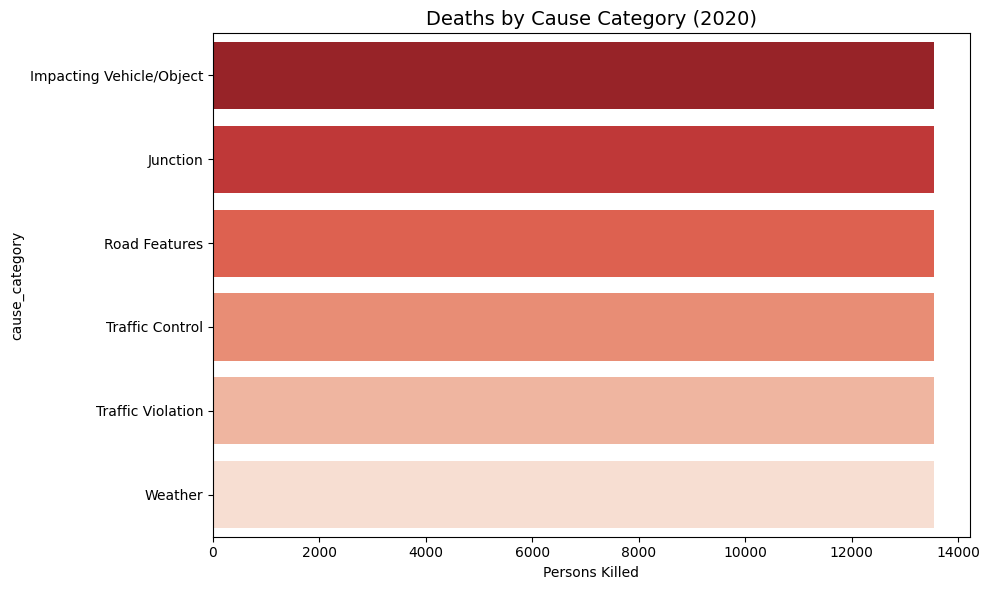

In [51]:
# Cause Category vs Persons Killed
cause_data = df[df['outcome_of_incident'] == 'Persons Killed']
cause_summary = cause_data.groupby('cause_category')['count'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=cause_summary.values, y=cause_summary.index, palette='Reds_r')
plt.title('Deaths by Cause Category (2020)', fontsize=14)
plt.xlabel('Persons Killed')
plt.tight_layout()
plt.show()

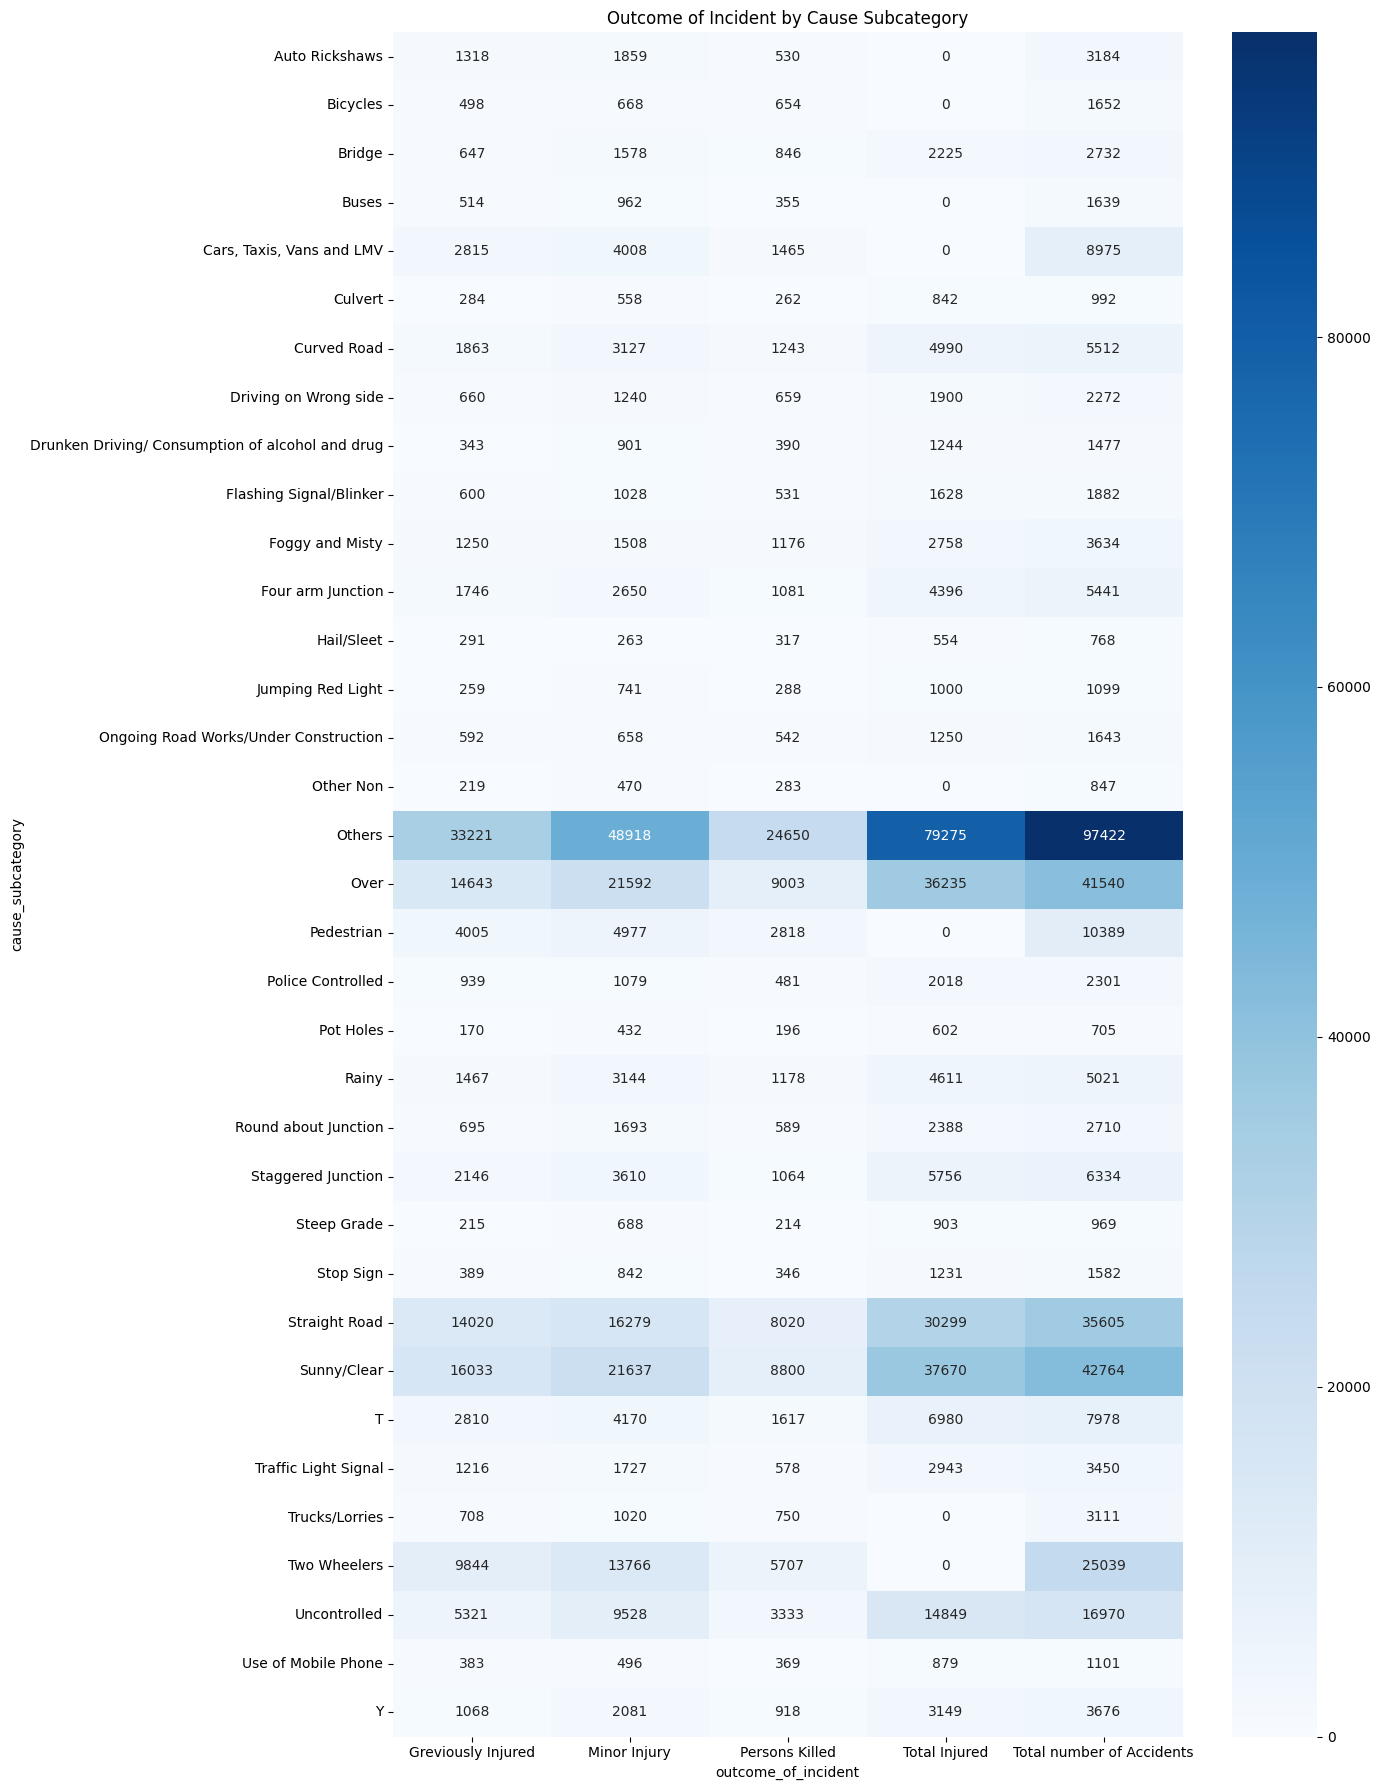

In [57]:
# Heatmap - Cause Subcategory vs Outcome
pivot_table = df.pivot_table(values='count', 
                             index='cause_subcategory', 
                             columns='outcome_of_incident', 
                             aggfunc='sum', fill_value=0)
plt.figure(figsize=(14, 18))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='Blues')
plt.title('Outcome of Incident by Cause Subcategory')
plt.tight_layout()
plt.show()

In [63]:
# Save cleaned dataset
df.to_csv('Regulatory Affairs of Road Accident Data 2020 India.csv', index=False)
print("\n✅ Cleaned dataset saved as 'Cleaned_Road_Accident_2020.csv'")


✅ Cleaned dataset saved as 'Cleaned_Road_Accident_2020.csv'
